<a href="https://colab.research.google.com/github/parnian91/Country-dataset/blob/main/CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CIFAR10 dataset classification

# Given an image, can we predict the correct class of this image?

 The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

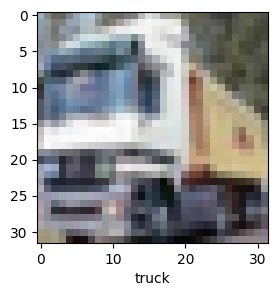

In [ ]:
plot_sample(x_train,y_train.reshape(-1,),1)

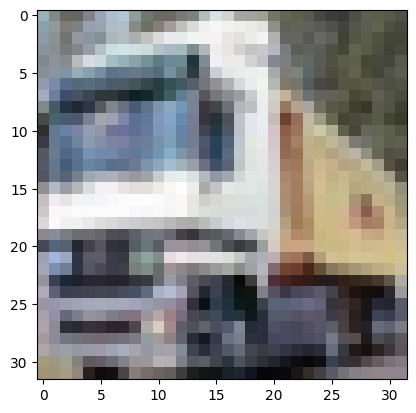

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train[1]

array([9], dtype=uint8)

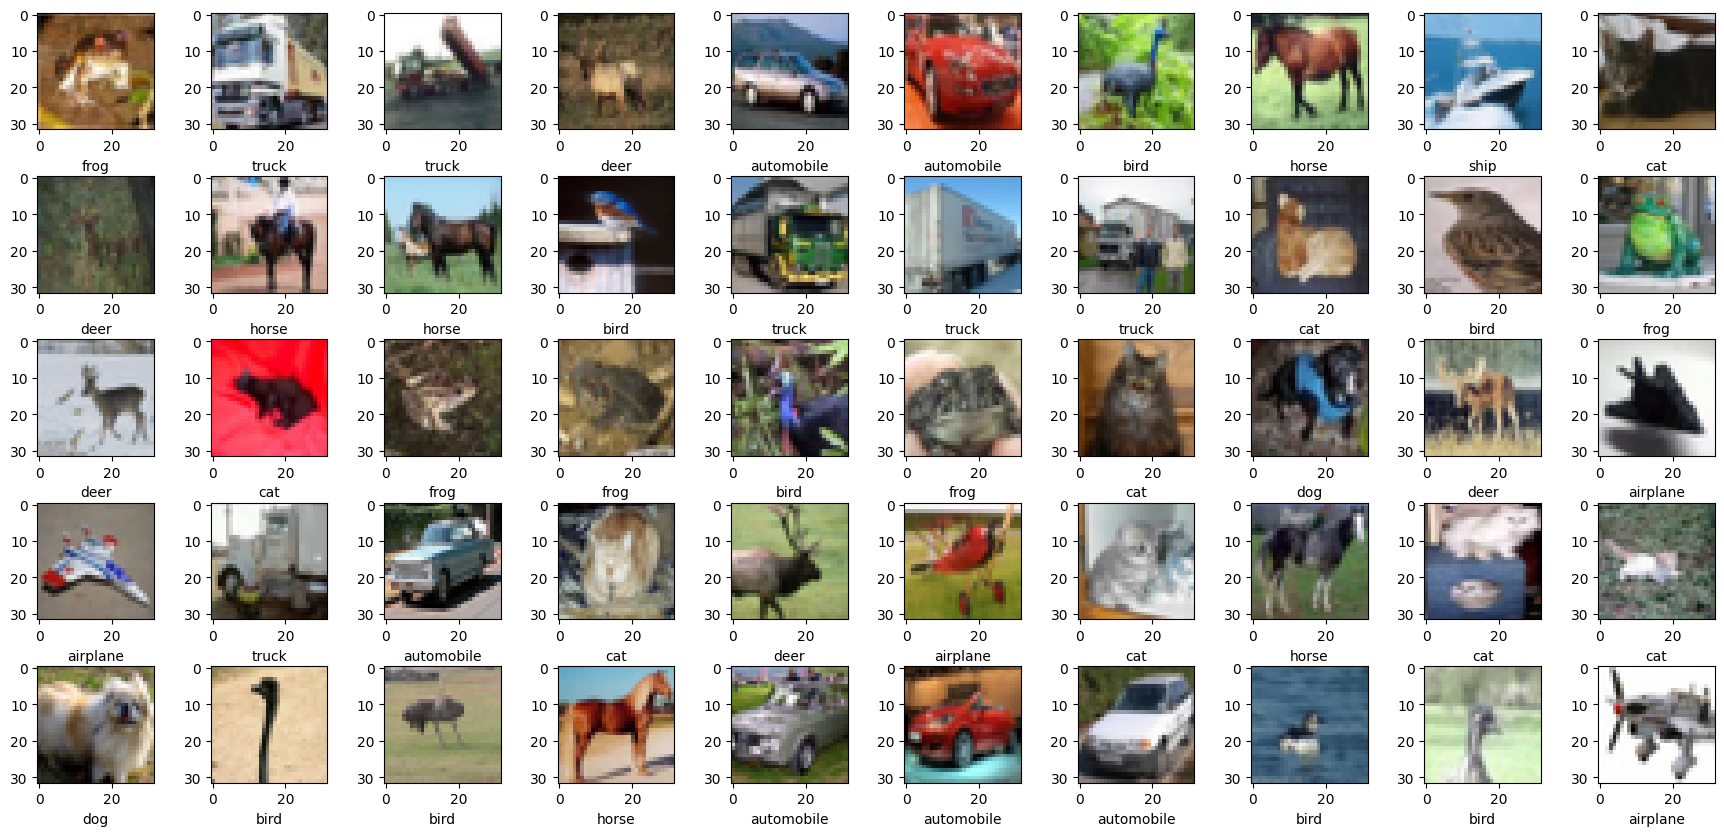

In [ ]:
k=1
plt.figure(figsize=(22,10))
for i in range(50):
  plt.subplot(5,10,k)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train.reshape(-1,)[i]])
  #plt.tight_layout(pad=2.0)
  plt.subplots_adjust(hspace=0.4)
  k+=1

In [ ]:
# Convert class labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Define the model
model = keras.Sequential([
    # Flattening the input images into a one-dimensional array of length 32 * 32 * 3 = 3072.
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(250, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 250)               768250    
                                                                 
 dense_10 (Dense)            (None, 128)               32128     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 801,668
Trainable params: 801,668
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
782/782 [==============================] - 5s 5ms/step - loss: 1.8706 - accuracy: 0.3301 - val_loss: 1.7158 - val_accuracy: 0.3879
Epoch 2/30
782/782 [==============================] - 3s 4ms/step - loss: 1.6884 - accuracy: 0.3988 - val_loss: 1.6227 - val_accuracy: 0.4256
Epoch 3/30
782/782 [==============================] - 3s 4ms/step - loss: 1.6103 - accuracy: 0.4240 - val_loss: 1.5391 - val_accuracy: 0.4529
Epoch 4/30
782/782 [==============================] - 3s 4ms/step - loss: 1.5695 - accuracy: 0.4387 - val_loss: 1.5948 - val_accuracy: 0.4374
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 1.5286 - accuracy: 0.4540 - val_loss: 1.5299 - val_accuracy: 0.4565
Epoch 6/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4914 - accuracy: 0.4681 - val_loss: 1.5182 - val_accuracy: 0.4624
Epoch 7/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4625 - accuracy: 0.4795 - val_loss: 1.4860 - val_accuracy: 0.4753
Epoch 

In [ ]:
metric = pd.DataFrame(model.history.history)

In [ ]:
metric

,loss,accuracy,val_loss,val_accuracy
0,1.870563,0.33014,1.715759,0.3879
1,1.688445,0.39884,1.622689,0.4256
2,1.610261,0.42400,1.539079,0.4529
3,1.569541,0.43866,1.594775,0.4374
4,1.528563,0.45402,1.529898,0.4565
5,1.491416,0.46808,1.518241,0.4624
6,1.462516,0.47954,1.485969,0.4753
7,1.442089,0.48308,1.521323,0.4622
8,1.420194,0.49172,1.472253,0.4791
9,1.403303,0.49800,1.511608,0.4745


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.4150 - accuracy: 0.5027
Test loss: 1.4149965047836304
Test accuracy: 0.5026999711990356


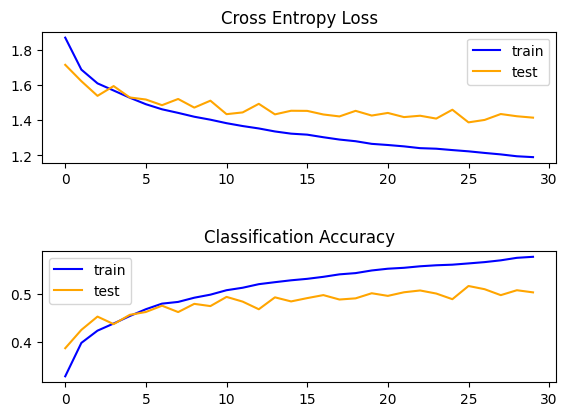

In [ ]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.tight_layout(pad=3.0)

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([3, 1, 8, ..., 2, 4, 7])

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
#y_pred = model.predict(x_test.reshape(10000,32,32,3))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58      1000
           1       0.56      0.69      0.62      1000
           2       0.44      0.27      0.34      1000
           3       0.31      0.37      0.34      1000
           4       0.41      0.48      0.44      1000
           5       0.42      0.37      0.39      1000
           6       0.52      0.58      0.55      1000
           7       0.56      0.54      0.55      1000
           8       0.61      0.68      0.64      1000
           9       0.58      0.51      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [ ]:
confusion_matrix(y_pred, y_test)

array([[532,  22,  67,  19,  43,  18,   4,  39,  78,  28],
       [ 59, 687,  34,  32,  16,  27,  30,  25,  75, 245],
       [ 47,  14, 273,  69,  79,  49,  39,  36,  10,  10],
       [ 40,  29, 129, 372, 103, 261, 106,  73,  44,  36],
       [ 35,   8, 187,  83, 481,  88, 128, 112,  28,  17],
       [ 15,  12,  82, 193,  34, 368,  59,  80,  13,  16],
       [ 22,  22, 110, 119, 117,  76, 580,  29,   8,  25],
       [ 38,  13,  75,  51,  85,  75,  24, 544,  15,  47],
       [159,  64,  25,  31,  29,  25,  17,  19, 677,  63],
       [ 53, 129,  18,  31,  13,  13,  13,  43,  52, 513]])

Test Accuracy : 50.27%
313/313 [==============================] - 1s 2ms/step


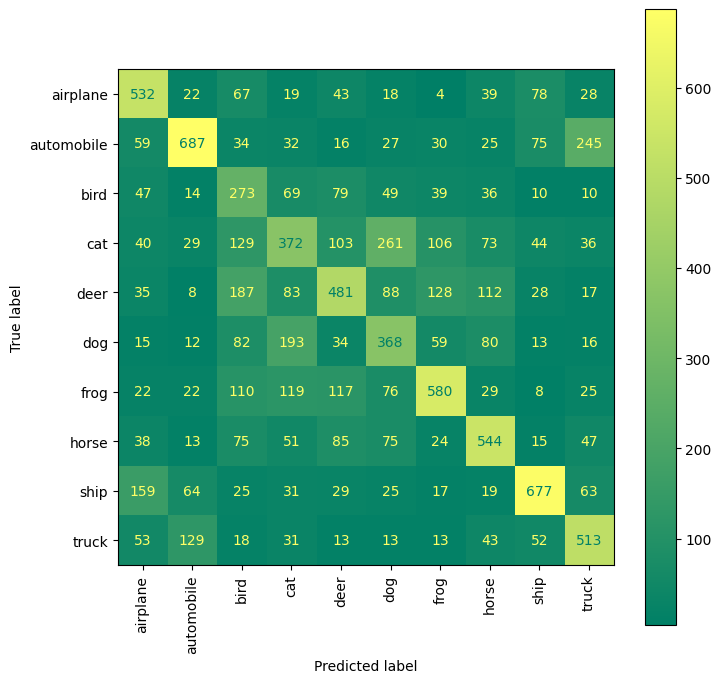

In [ ]:
#evaluation = model.evaluate(x_test, y_test)
#print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

#accuracy
print(f'Test Accuracy : {accuracy * 100:.2f}%')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_pred, y_test)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

<Axes: >

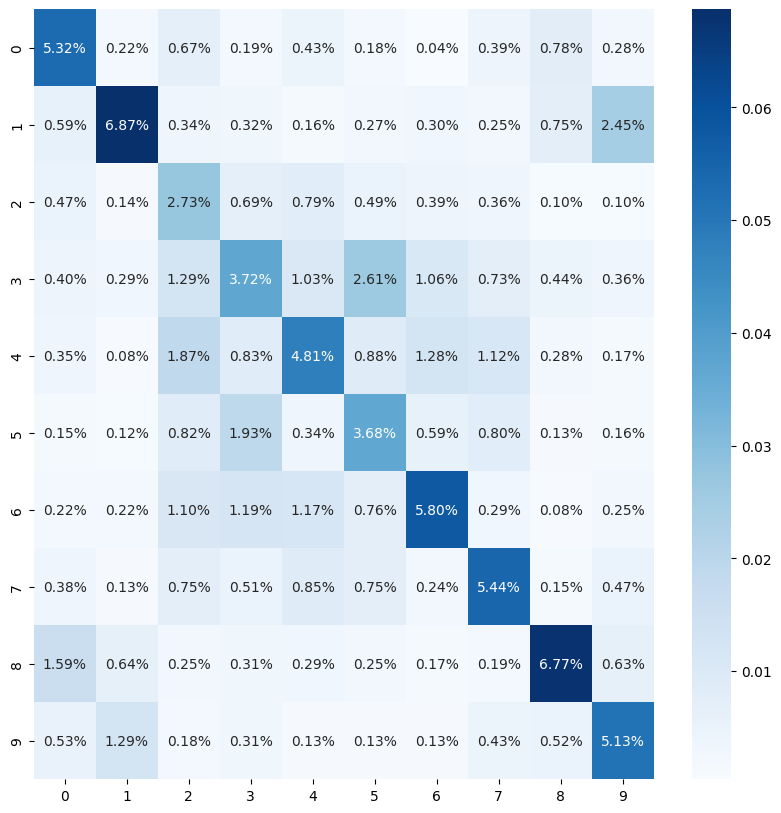

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_pred

array([3, 1, 8, ..., 2, 4, 7])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{classes[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({classes[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:

classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 1s 2ms/step


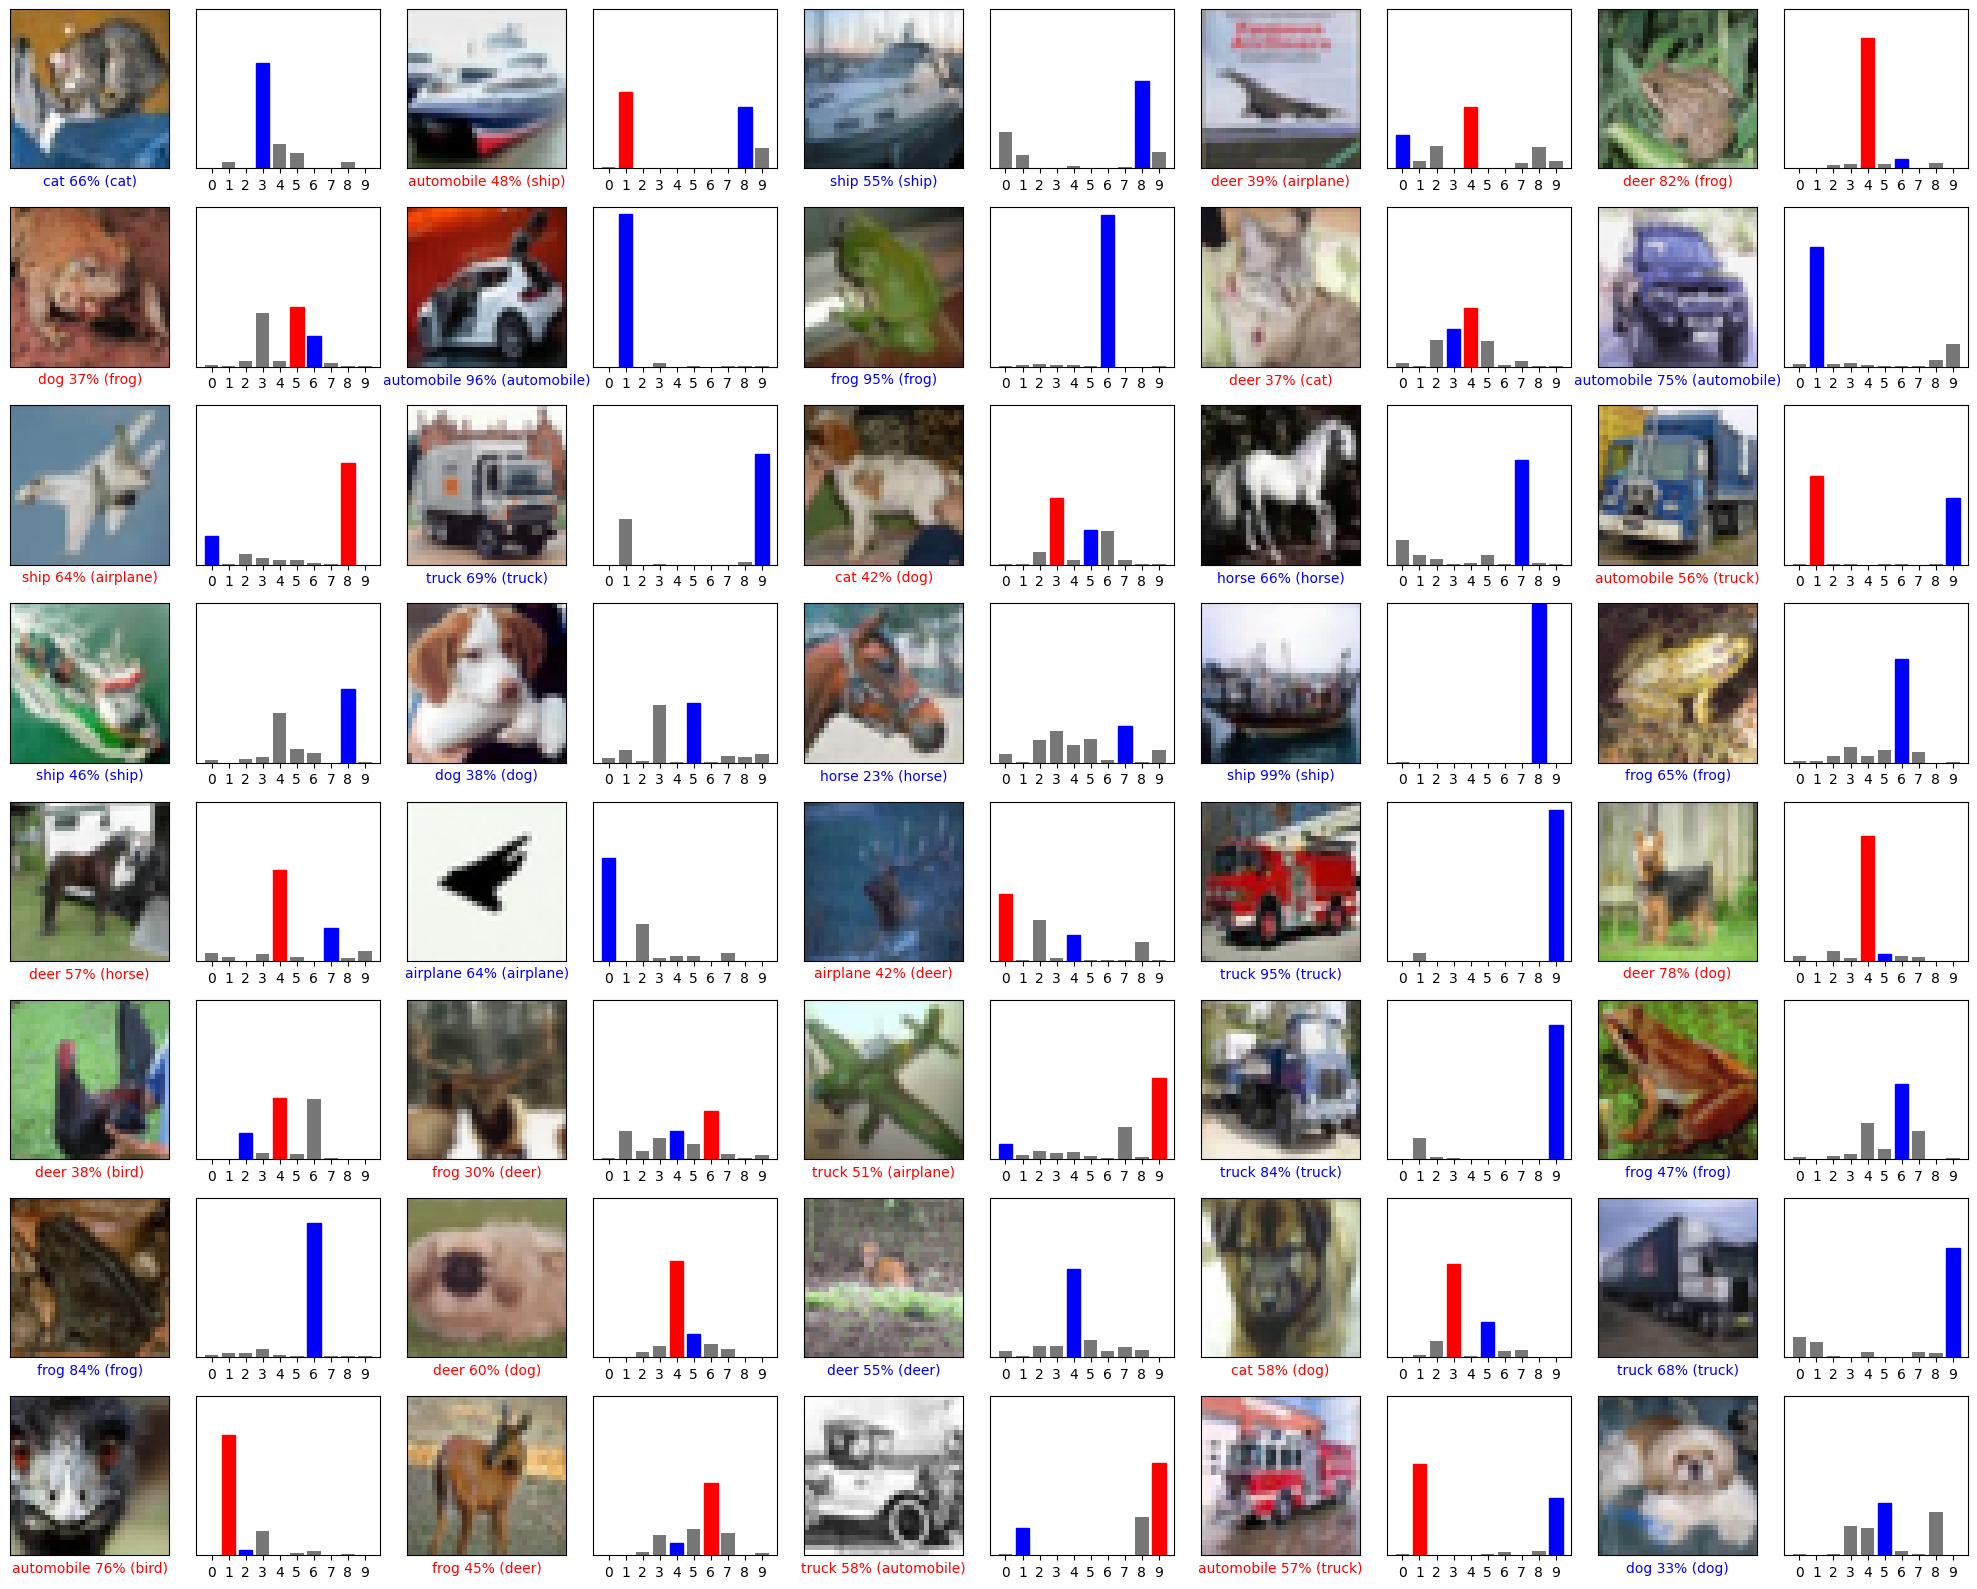

In [ ]:
predictions = model.predict(x_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

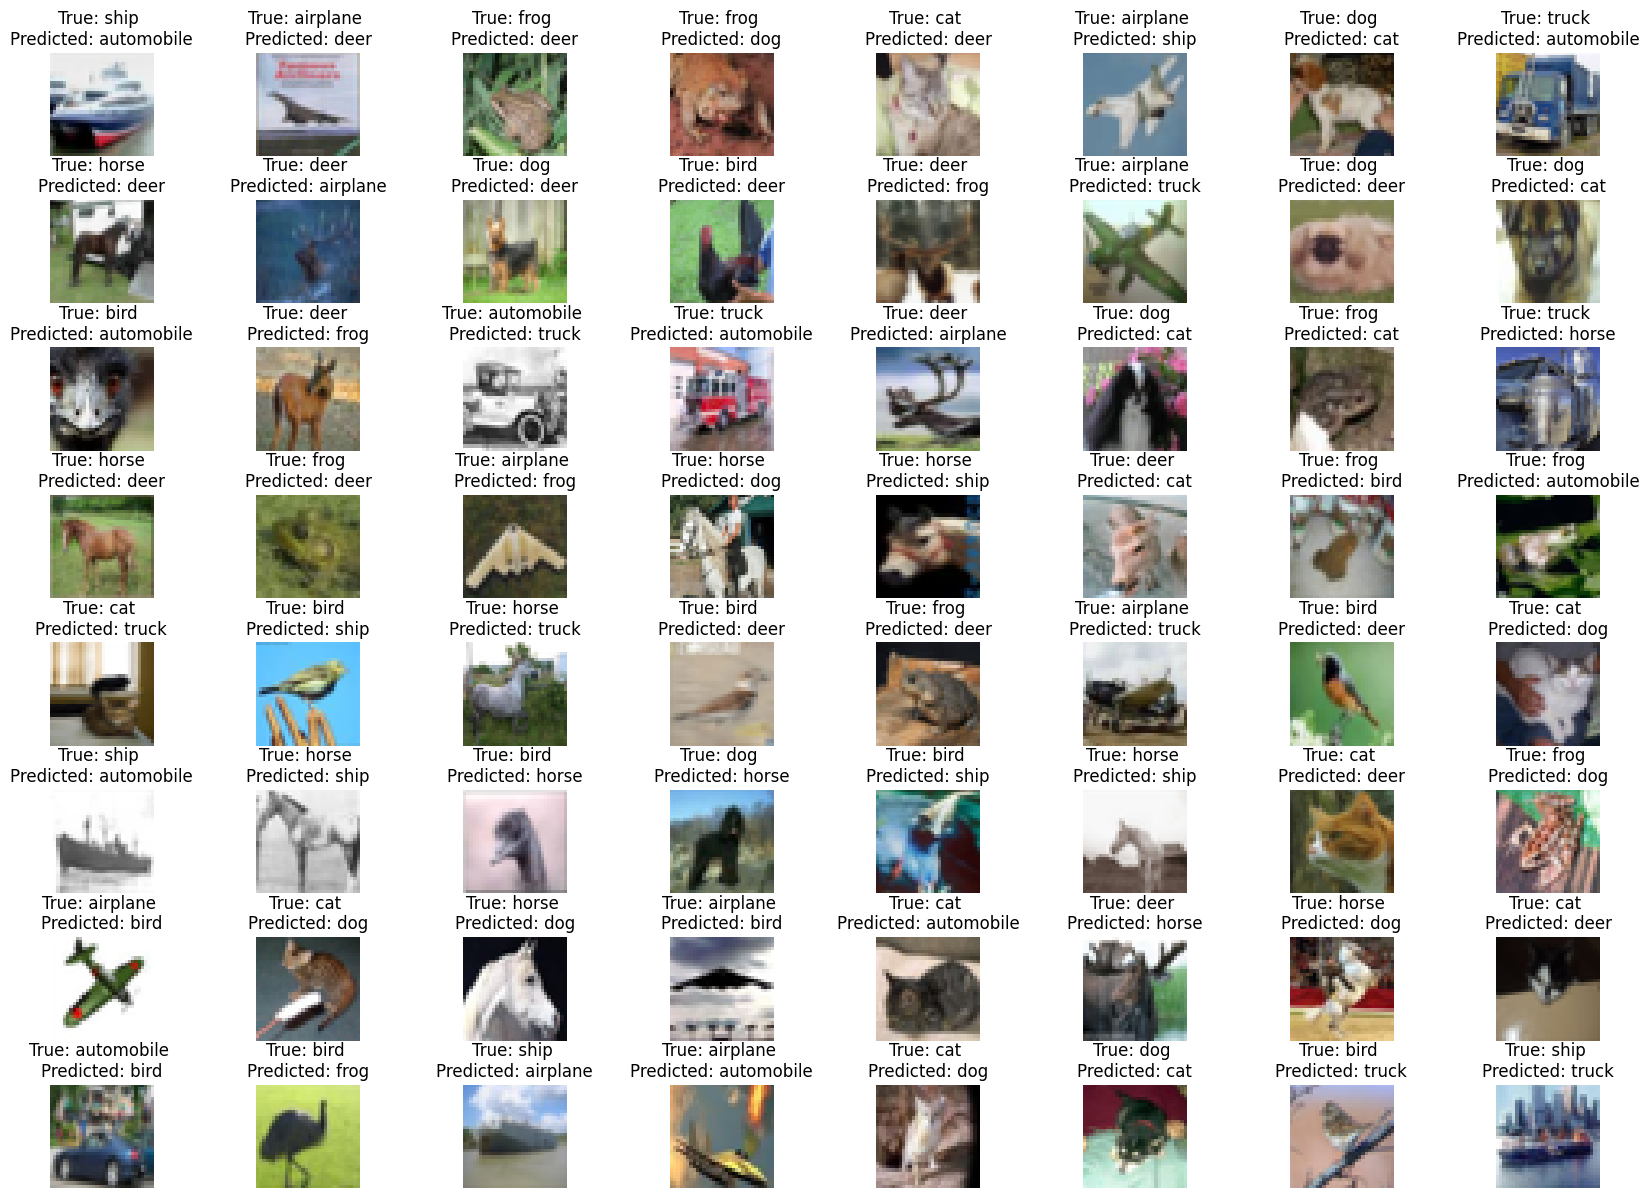

In [ ]:
R = 8
C = 8
fig, axes = plt.subplots(R, C, figsize=(20,15))
axes = axes.ravel()


misclassified_idx = np.where(y_pred != y_test)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (classes[y_test[misclassified_idx[i]]],
                                                  classes[y_pred[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Predict a desired image

In [ ]:
# Select a random image from the test set
index = np.random.randint(0, len(x_test))
image = x_test[index]

In [ ]:
### Reshape the image to match the input shape of the model

# In this case, 1 indicates that we are reshaping a single image (batch size of 1).
# The subsequent dimensions 32, 32, 3 represent the width, height, and number of color channels, respectively.
image = image.reshape(1, 32, 32, 3)

In [ ]:
# Make the prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

print("Predicted class:", predicted_class)
print("Actual class:", np.argmax(y_test[index]))

1/1 [==============================] - 0s 33ms/step
Predicted class: 6
Actual class: 0


In [ ]:
classes[predicted_class]

'frog'

In [ ]:
classes[np.argmax(y_test[index])]

'airplane'

In [ ]:
y_test[index]

6

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[index]

array([5.9441449e-03, 2.1683762e-04, 5.5124797e-02, 2.0314702e-01,
       5.3644557e-02, 2.3732178e-01, 4.1877365e-01, 1.8079059e-02,
       6.5041054e-03, 1.2440553e-03], dtype=float32)